In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import json
import random
#import seaborn as sns


from collections import defaultdict
from operator import itemgetter

import helper_functions as hf
import rank_eval_pipeline as rep


subsample_proportions = [0.0001, 0.00016, 0.00025, 0.0004, 0.00063,
                         0.001, 0.0016, 0.0025, 0.004, 0.0063,
                         0.01,
                         0.1]

In [3]:
with open('results/RF_compiled_metrics.pickle', 'rb') as handle:
    compiled_metrics = pickle.load(handle)

In [4]:
with open('results/RF_bootstrap_results.pickle', 'rb') as handle:
    bootstrap_results = pickle.load(handle)

In [5]:
bootstrap_data = [bootstrap_results[sub] for sub in subsample_proportions]

bootstrap_data

[[0.45355497720004445,
  0.4534608142236496,
  0.4575933197427399,
  0.4457693819924524,
  0.43466647449025175,
  0.44430442302647016,
  0.46276443224545105,
  0.45690649843381925,
  0.4737341536912512,
  0.4406400121840496,
  0.42381883372652357,
  0.44011522868889996,
  0.4619365293104906,
  0.45433353094912937,
  0.43983121558300764,
  0.4567706343748428,
  0.4706216711834591,
  0.45314907038487723,
  0.46101678493719017,
  0.46170581779148845,
  0.43517833241881804,
  0.46494047134207356,
  0.453002590492434,
  0.4790823059512877,
  0.4571853031406956,
  0.4381629785451858,
  0.4528793790556481,
  0.4372948916717004,
  0.45318076379916367,
  0.4328321772234281,
  0.46300020814256365,
  0.4629843639599601,
  0.4600907198978959,
  0.46582339524818156,
  0.45237876630736246,
  0.4652881148635443,
  0.4635303512249496,
  0.433263728201359,
  0.439237053531746,
  0.44647728645254475,
  0.4550519875310045,
  0.4622487132152207,
  0.45333078280543826,
  0.4357636069977757,
  0.48338451074

In [6]:
# get the mean and 95CI for each subsample proportion
mean_auc = [np.mean(bootstrap_results[sub]) for sub in subsample_proportions]
lower_ci = [np.percentile(bootstrap_results[sub], 2.5) for sub in subsample_proportions]
upper_ci = [np.percentile(bootstrap_results[sub], 97.5) for sub in subsample_proportions]

In [7]:
boxplot_data = [compiled_metrics[sub]["auc_first_gen"] for sub in subsample_proportions]

In [8]:
# get the mean and 95CI for each subsample proportion for the boxplot data
mean_auc_boxplot = [np.mean(compiled_metrics[sub]["auc_first_gen"]) for sub in subsample_proportions]
lower_ci_boxplot = [np.percentile(compiled_metrics[sub]["auc_first_gen"], 2.5) for sub in subsample_proportions]
upper_ci_boxplot = [np.percentile(compiled_metrics[sub]["auc_first_gen"], 97.5) for sub in subsample_proportions]

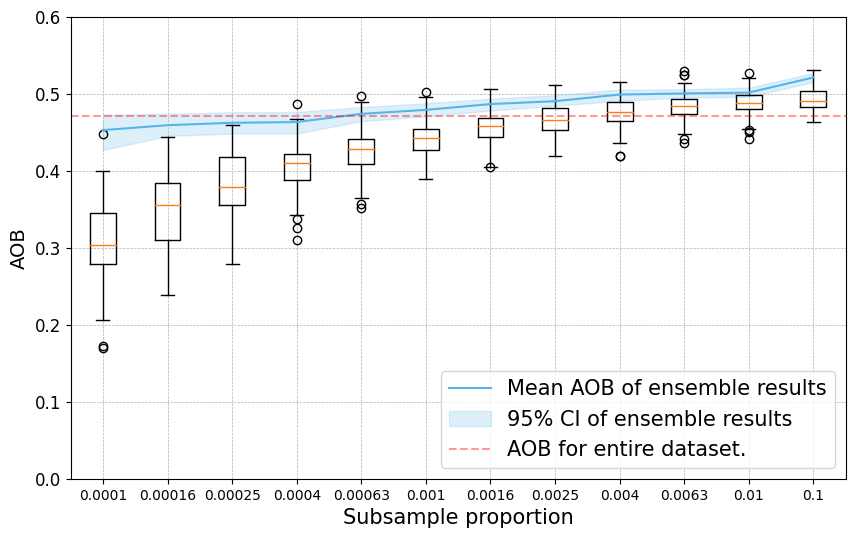

In [9]:
plt.figure(figsize=(10, 6))

# Use indices as x-values for boxplot
x_values_boxplot = np.arange(1, len(boxplot_data) + 1)
for position, values in zip(x_values_boxplot, boxplot_data):
    plt.boxplot(values, positions=[position], widths=0.4)

# Plot mean and CI
plt.plot(x_values_boxplot, mean_auc, color='#56B4E9', label="Mean AOB of ensemble results", alpha=1.0)
plt.fill_between(x_values_boxplot, lower_ci, upper_ci, alpha=0.2, color='#56B4E9', label="95% CI of ensemble results")

plt.hlines(y=0.471, xmin=0.5, xmax=12.5, alpha = 0.4, colors='r', linestyles='dashed', label="AOB for entire dataset.")

# Set the x-axis labels
plt.xticks(x_values_boxplot, subsample_proportions)

plt.yticks(fontsize=12)
plt.xlim(0.5, 12.5)
plt.ylim(0, 0.6)
plt.ylabel("AOB", fontsize=14)
plt.xlabel("Subsample proportion", fontsize=15)

plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)


plt.legend(loc="lower right", fontsize=15)
plt.savefig("img/RF_bootstrap_results_ensemble_mixed.png", dpi=400, bbox_inches='tight')
plt.show()

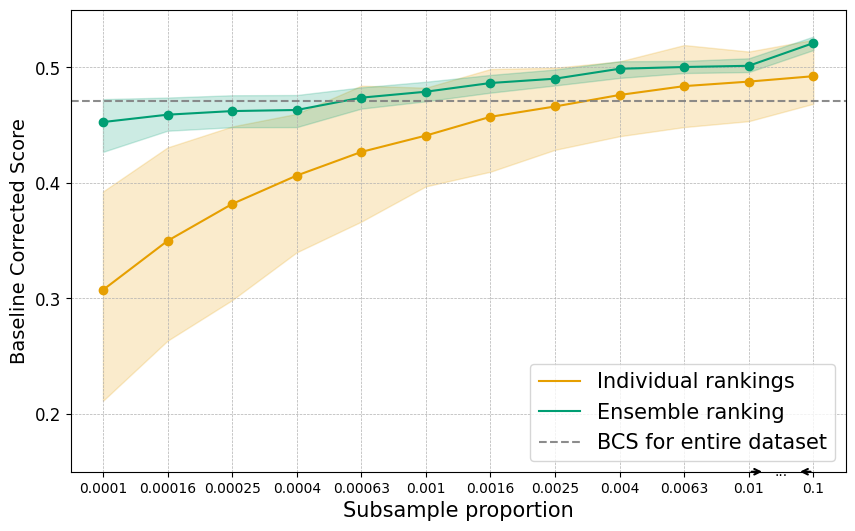

In [58]:
plt.figure(figsize=(10, 6))


# mean and CI for boxplot data
plt.plot(x_values_boxplot, mean_auc_boxplot, color='#E69F00', label="Individual rankings", alpha=1.0)
plt.fill_between(x_values_boxplot, lower_ci_boxplot, upper_ci_boxplot, alpha=0.2, color='#E69F00')

# Add points for individual rankings
plt.scatter(x_values_boxplot, mean_auc_boxplot, color='#E69F00', zorder=3)

# Plot mean and CI of bootstrap results
plt.plot(x_values_boxplot, mean_auc, color='#009E73', label="Ensemble ranking", alpha=1.0)
plt.fill_between(x_values_boxplot, lower_ci, upper_ci, alpha=0.2, color='#009E73') #, label="95% CI of ensemble results")

# Add points for ensemble rankings
plt.scatter(x_values_boxplot, mean_auc, color='#009E73', zorder=3)

plt.hlines(y=0.471, xmin=0.5, xmax=12.5, alpha = 0.9, colors='grey', linestyles='dashed', label="BCS for entire dataset")

# Set the x-axis labels
plt.xticks(x_values_boxplot, subsample_proportions)
plt.yticks([0.20, 0.30, 0.40, 0.50], fontsize=12)

plt.yticks(fontsize=12)
plt.xlim(0.5, 12.5)
plt.ylim(0.15, 0.55)
plt.ylabel("Baseline Corrected Score", fontsize=14)
plt.xlabel("Subsample proportion", fontsize=15)

plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)


mid_point_x = (x_values_boxplot[-2] + x_values_boxplot[-1]) / 2
mid_point_y = 0.15  # adjust this as needed

# Draw '...' annotation
plt.annotate('...', xy=(mid_point_x, mid_point_y), color='black', ha='center', va='center')

# Add arrow annotations on x-axis
arrow_length = (x_values_boxplot[-1] - x_values_boxplot[-2]) / 4  # adjust as needed

# Arrow pointing from second last x_value towards last x_value
plt.annotate('', xy=(x_values_boxplot[-2] + arrow_length, 0.15),
             xytext=(x_values_boxplot[-2], 0.15),
             arrowprops=dict(arrowstyle='->', lw=1.5))

# Arrow pointing from last x_value towards second last x_value
plt.annotate('', xy=(x_values_boxplot[-1] - arrow_length, 0.15),
             xytext=(x_values_boxplot[-1], 0.15),
             arrowprops=dict(arrowstyle='->', lw=1.5))


plt.legend(loc="lower right", fontsize=15)
plt.savefig("img/RF_bootstrap_results_ensemble_lines.png", dpi=400, bbox_inches='tight')
plt.show()

NameError: name 'sns' is not defined

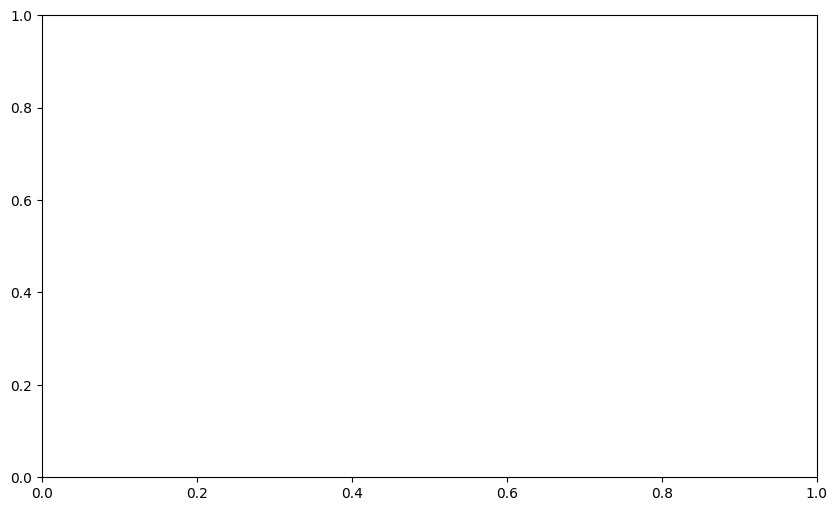

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=boxplot_data, ax=ax, color='blue')
sns.boxplot(data=bootstrap_data, ax=ax, color='orange')

plt.hlines(y=0.471, xmin=0.5, xmax=12.5, alpha = 0.4, colors='r', linestyles='dashed', label="AUC for entire dataset.")

# Add 1 to the x-coordinates of the points in the line plot
x_values_lineplot = np.arange(1, len(boxplot_data) + 1)

# Set the x-axis labels
ax.set_xticks(x_values_lineplot)
ax.set_xticklabels(subsample_proportions)

ax.set_xlim(0.5, 12.5)
ax.set_ylim(0, 0.6)
ax.legend(loc="lower right")
plt.savefig("img/RF_bootstrap_results_ensemble_boxplots.png", dpi=400, bbox_inches='tight')
plt.show()

In [13]:
directories = ["anova_f_0.01_batch",
                "chi2_0.01_batch",
                "mrmr_0.01_batch",
                 "mutual_info_0.01_batch",
                 "pearson_correlation_0.01_batch",
                 "random_forest_0.01_batch",
                 "xgboost_0.01_batch"]

# ALL ALGOS plot

In [59]:
# Directory containing JSON files
results_dir = "results"

# Create a dictionary to hold the results
results = {}

# List of markers to cycle through
#markers = ["o", "s", "D", "^", "v", "*", "X", "x", "p", "h", "P", "d", "|", "_"]
manual_markers = ["o", "s", "D", "^", "v", "*", "X", "x", "p", "h", "P", "d", "|", "_"]
#colorblind_colors = ['#56B4E9', '#E69F00', '#009E73', '#0072B2', '#D55E00', '#CC79A7', '#F0E442', '#999999']
manual_colors = ['#56B4E9', '#56B4E9', '#56B4E9', '#E69F00', '#E69F00', '#56B4E9', '#56B4E9', '#009E73', '#E69F00', '#E69F00', '#E69F00', '#009E73']

# Counter for the index of the next marker to use
marker_counter = 0

# Walk through the directory
for filename in os.listdir(results_dir):
    if filename.endswith('.json'):
        filepath = os.path.join(results_dir, filename)

        # Access the rank_algo and subsampling_proportion
        with open(filepath, 'r') as f:
            data = json.load(f)

        if data.get("subsampling_proportion") == 0.01:
            # Get the rank_algo from the data
            rank_algo = data.get("rank_algo")

            # If this rank_algo is not yet in the results, add it with empty lists
            if rank_algo not in results:
                results[rank_algo] = {"auc_first_gen": [], "auc_singles": [], "exec_time": []}

            # Apply the function to each JSON file
            metrics = hf.corrected_performance_time_metric(filepath)

            # Add results to the dictionary
            results[rank_algo]["auc_first_gen"].append(metrics["auc_first_gen"])
            results[rank_algo]["auc_singles"].append(metrics["auc_singles"])
            results[rank_algo]["exec_time"].append(metrics["exec_time"])



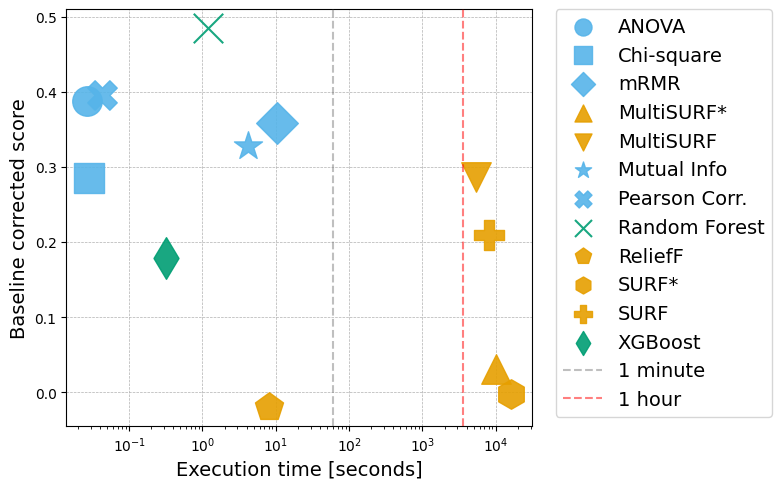

In [60]:
# Create the plots
plt.style.use('default')

plt.figure(figsize=(8, 5))

labels = ["ANOVA", "Chi-square", "mRMR", "MultiSURF*", "MultiSURF", "Mutual Info", "Pearson Corr.", "Random Forest", "ReliefF", "SURF*", "SURF", "XGBoost"]

# Plot data points for each algorithm
for algo, metrics in results.items():

    label = labels[marker_counter % len(manual_markers)]

    plt.scatter(metrics["exec_time"], metrics["auc_first_gen"], label=label,
                marker=manual_markers[marker_counter % len(manual_markers)],
                color=manual_colors[marker_counter % len(manual_colors)], alpha=0.9,
                s=450, zorder=3)
    marker_counter += 1

#plt.title('Results for 1% subsampling with baseline correction')
plt.xlabel('Execution time [seconds]', fontsize=14)
plt.ylabel('Baseline corrected score', fontsize=14)
plt.xscale('log')

plt.axvline(x=60, color='gray', linestyle='--', label="1 minute", alpha=0.5, zorder=3)
plt.axvline(x=3600, color='red', linestyle='--', label="1 hour", alpha=0.5, zorder=3)

# Display the legend outside the plot
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=14)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=14)

# Change the marker size manually for both lines
for handle in legend.legendHandles:
    handle._sizes = [150]  # or any other size you want

plt.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, zorder=1)

plt.tight_layout()
plt.savefig("img/all_algos.png", dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
boxplot_data = [compiled_metrics[sub]["auc_first_gen"] for sub in subsample_proportions]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=subsample_proportions, meanline=True)

#plt.hlines(y=0.471, xmin=0.5, xmax=12.5, alpha = 0.4, colors='r', linestyles='dashed', label="AUC for entire dataset.")

# Add 1 to the x-coordinates of the points in the line plot
x_values_lineplot = np.arange(1, len(boxplot_data) + 1)

# Set the x-axis labels
plt.xticks(x_values_lineplot, subsample_proportions, size=10)
plt.yticks(size=12)

plt.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, zorder=1)


plt.xlim(0.5, 12.5)
plt.ylim(0.1, 0.6)
#plt.legend(loc="lower right")
plt.savefig("img/ensemble_boxplot.png", dpi=400, bbox_inches='tight')
plt.show()

## Time perf. comparison table

In [61]:
h = [compiled_metrics[sub] for sub in subsample_proportions]

In [81]:
from tabulate import tabulate

table = []
for i in range(len(subsample_proportions)):
    table.append([subsample_proportions[i], 100* h[i]["average_exec_time"]])

print(tabulate(table, headers=["Subsampling proportion", "Average execution time [s]"], tablefmt="github"))


|   Subsampling proportion |   Average execution time [s] |
|--------------------------|------------------------------|
|                  0.0001  |                      10.5074 |
|                  0.00016 |                      11.4063 |
|                  0.00025 |                      12.5508 |
|                  0.0004  |                      14.7624 |
|                  0.00063 |                      17.7497 |
|                  0.001   |                      22.91   |
|                  0.0016  |                      31.0869 |
|                  0.0025  |                      42.7833 |
|                  0.004   |                      63.0375 |
|                  0.0063  |                      93.3187 |
|                  0.01    |                     138.686  |
|                  0.1     |                    1492.14   |


In [73]:
g = [bootstrap_results[sub] for sub in subsample_proportions]

In [74]:
g

[[0.45355497720004445,
  0.4534608142236496,
  0.4575933197427399,
  0.4457693819924524,
  0.43466647449025175,
  0.44430442302647016,
  0.46276443224545105,
  0.45690649843381925,
  0.4737341536912512,
  0.4406400121840496,
  0.42381883372652357,
  0.44011522868889996,
  0.4619365293104906,
  0.45433353094912937,
  0.43983121558300764,
  0.4567706343748428,
  0.4706216711834591,
  0.45314907038487723,
  0.46101678493719017,
  0.46170581779148845,
  0.43517833241881804,
  0.46494047134207356,
  0.453002590492434,
  0.4790823059512877,
  0.4571853031406956,
  0.4381629785451858,
  0.4528793790556481,
  0.4372948916717004,
  0.45318076379916367,
  0.4328321772234281,
  0.46300020814256365,
  0.4629843639599601,
  0.4600907198978959,
  0.46582339524818156,
  0.45237876630736246,
  0.4652881148635443,
  0.4635303512249496,
  0.433263728201359,
  0.439237053531746,
  0.44647728645254475,
  0.4550519875310045,
  0.4622487132152207,
  0.45333078280543826,
  0.4357636069977757,
  0.48338451074

In [80]:
table = []
for i in range(len(subsample_proportions)):
    table.append([subsample_proportions[i], g[i]["average_exec_time"]])

print(tabulate(table, headers=["Subsampling proportion", "Average execution time [s]"], tablefmt="github"))

TypeError: list indices must be integers or slices, not str

In [75]:
def evaluate_ranking(features, scores, cumulative_exec_time=np.inf):
    """
    Takes feature ranking and scores and returns the AUC of the first generation and singles as well as the execution time if
    it was passed to the function.
    """
    RE = rep.RankEval("","")
    RE.ranking = features
    RE.scores = scores
    RE.evaluate_ranking()

    baseline = hf.get_true_baseline()

    auc_first_gen = np.mean(RE.eval_res_first_gen[0] - baseline)/(1 - hf.area_under_the_curve(baseline))
    auc_singles = np.mean(RE.eval_res_singles[0] - baseline)/(1 - hf.area_under_the_curve(baseline))

    return {"auc_first_gen": auc_first_gen, "auc_singles": auc_singles, "exec_time": cumulative_exec_time}

def average_ranking(rankings, times):
    """
    Using the borda count method, average the rankings in the list of rankings
    """
    scores = defaultdict(int)
    for ranking in rankings:
        for i, feature in enumerate(ranking):
            scores[feature] += len(ranking) - i

    # sort by score, highest first
    average_ranking = sorted(scores.items(), key=itemgetter(1), reverse=True)

    # extract the features and their scores from the (feature, score) pairs
    average_features = [feature for feature, score in average_ranking]
    average_scores = [score for feature, score in average_ranking]
    cumulative_time = np.sum(times)

    return average_features, average_scores, cumulative_time

def get_ensemble_metrics(files_list):
    """
    Takes a list of files and returns two lists.
    """
    rankings = []
    times = []
    results_cache = {}

    for file in files_list:
        if file in results_cache:
            ranking, time = results_cache[file]
        else:
            with open(file) as f:
                data = json.load(f)
            ranking = data["results"]["features"]
            time = data["exec_time"]
            results_cache[file] = (ranking, time)

        rankings.append(ranking)
        times.append(time)

    avg_ranking, total_scores, cum_time = average_ranking(rankings, times)

    return avg_ranking, total_scores, cum_time

def get_files_list(subsample_proportion, directory, hash='all'):
    """
    Returns a list of files that match the given subsampling proportion and hash value.

    Args:
        subsample_proportion (float): The desired subsampling proportion.
        directory (str): The directory path where the files are located.
        hash (str, optional): The hash value to filter the files (default: 'all').

    Returns:
        list: A list of files that match the specified subsampling proportion and hash value.
    """
    files = []

    all_files = os.listdir(directory)
    for file in all_files:
        if (f"sub{subsample_proportion}_" in file and f"features-{hash}" in file):
            files.append(directory + file)

    return files

def evaluate_ranking(features, scores, cumulative_exec_time=np.inf):
    """
    Takes feature ranking and scores and returns the AUC of the first generation and singles as well as the execution time if
    it was passed to the function.
    """
    RE = rep.RankEval("", "")
    RE.ranking = features
    RE.scores = scores
    RE.evaluate_ranking()

    baseline = hf.get_true_baseline()

    auc_first_gen = np.mean(RE.eval_res_first_gen[0] - baseline) / (1 - hf.area_under_the_curve(baseline))
    auc_singles = np.mean(RE.eval_res_singles[0] - baseline) / (1 - hf.area_under_the_curve(baseline))

    return {"auc_first_gen": auc_first_gen, "auc_singles": auc_singles, "exec_time": cumulative_exec_time}

In [82]:
lineplot_data = [(sub, evaluate_ranking(*get_ensemble_metrics(get_files_list(sub, "results/random_forest_optimization/")))) for sub in subsample_proportions]

In [83]:
lineplot_data

[(0.0001,
  {'auc_first_gen': 0.4620985556512825,
   'auc_singles': 0.16232274696586124,
   'exec_time': 10.507395267486572}),
 (0.00016,
  {'auc_first_gen': 0.45902898935062136,
   'auc_singles': 0.13352081206239133,
   'exec_time': 11.406264543533325}),
 (0.00025,
  {'auc_first_gen': 0.46348191678851774,
   'auc_singles': 0.1414256908320008,
   'exec_time': 12.55080270767212}),
 (0.0004,
  {'auc_first_gen': 0.4687214436628085,
   'auc_singles': 0.14498408132936036,
   'exec_time': 14.762385129928589}),
 (0.00063,
  {'auc_first_gen': 0.47404847261525773,
   'auc_singles': 0.1451439900667773,
   'exec_time': 17.74973773956299}),
 (0.001,
  {'auc_first_gen': 0.47949814892709847,
   'auc_singles': 0.14195247239119385,
   'exec_time': 22.910016775131226}),
 (0.0016,
  {'auc_first_gen': 0.487633525624858,
   'auc_singles': 0.1476729840740206,
   'exec_time': 31.086889505386353}),
 (0.0025,
  {'auc_first_gen': 0.4868989412097119,
   'auc_singles': 0.14693517605130402,
   'exec_time': 42.783

In [86]:
table = []
for i in range(len(subsample_proportions)):
    table.append([subsample_proportions[i], lineplot_data[i][1]["exec_time"]])

print(tabulate(table, headers=["Subsampling proportion", "Average execution time [s]"], tablefmt="github"))

|   Subsampling proportion |   Average execution time [s] |
|--------------------------|------------------------------|
|                  0.0001  |                      10.5074 |
|                  0.00016 |                      11.4063 |
|                  0.00025 |                      12.5508 |
|                  0.0004  |                      14.7624 |
|                  0.00063 |                      17.7497 |
|                  0.001   |                      22.91   |
|                  0.0016  |                      31.0869 |
|                  0.0025  |                      42.7833 |
|                  0.004   |                      63.0375 |
|                  0.0063  |                      93.3187 |
|                  0.01    |                     138.686  |
|                  0.1     |                    1492.14   |


In [88]:
# print a table with the results (propotion and exec time), add the results from h and lineplot_data

table = []
for i in range(len(subsample_proportions)):
    table.append([subsample_proportions[i], 100* h[i]["average_exec_time"], lineplot_data[i][1]["exec_time"]])

print(tabulate(table, headers=["Subsampling proportion", "Average execution time [s]", "Average execution time [s]"], tablefmt="github"))

|   Subsampling proportion |   Average execution time [s] |   Average execution time [s] |
|--------------------------|------------------------------|------------------------------|
|                  0.0001  |                      10.5074 |                      10.5074 |
|                  0.00016 |                      11.4063 |                      11.4063 |
|                  0.00025 |                      12.5508 |                      12.5508 |
|                  0.0004  |                      14.7624 |                      14.7624 |
|                  0.00063 |                      17.7497 |                      17.7497 |
|                  0.001   |                      22.91   |                      22.91   |
|                  0.0016  |                      31.0869 |                      31.0869 |
|                  0.0025  |                      42.7833 |                      42.7833 |
|                  0.004   |                      63.0375 |                      63.0375 |

In [93]:
g = [compiled_metrics[sub] for sub in subsample_proportions]

In [94]:
g

[{'auc_first_gen': [0.17216119260275928,
   0.2404673132067443,
   0.3013807967134564,
   0.30510334669100936,
   0.32845075267640145,
   0.39959754926349406,
   0.22204113108499718,
   0.3227194421521837,
   0.2607501005172762,
   0.36033020056566634,
   0.30041645214757406,
   0.33684194922930927,
   0.2353985456385086,
   0.3843798140891328,
   0.28971097298551185,
   0.2290497383358814,
   0.3270432786926382,
   0.29333406211471785,
   0.3802013760767593,
   0.2990656100143436,
   0.37085590692484766,
   0.28367688346552417,
   0.3572579155044806,
   0.35867894727491395,
   0.3001141641986242,
   0.27917691224584923,
   0.29594196264204936,
   0.37615984249045037,
   0.3318989459014876,
   0.2781822151106872,
   0.28112134573016795,
   0.24789951793458556,
   0.2814619730636795,
   0.28469127046730136,
   0.3397335509264872,
   0.35564955875868626,
   0.3030558576146111,
   0.3473464701063132,
   0.2948231218547473,
   0.36310797989388377,
   0.3823018049500713,
   0.36522335419875

In [92]:
h

[[0.45355497720004445,
  0.4534608142236496,
  0.4575933197427399,
  0.4457693819924524,
  0.43466647449025175,
  0.44430442302647016,
  0.46276443224545105,
  0.45690649843381925,
  0.4737341536912512,
  0.4406400121840496,
  0.42381883372652357,
  0.44011522868889996,
  0.4619365293104906,
  0.45433353094912937,
  0.43983121558300764,
  0.4567706343748428,
  0.4706216711834591,
  0.45314907038487723,
  0.46101678493719017,
  0.46170581779148845,
  0.43517833241881804,
  0.46494047134207356,
  0.453002590492434,
  0.4790823059512877,
  0.4571853031406956,
  0.4381629785451858,
  0.4528793790556481,
  0.4372948916717004,
  0.45318076379916367,
  0.4328321772234281,
  0.46300020814256365,
  0.4629843639599601,
  0.4600907198978959,
  0.46582339524818156,
  0.45237876630736246,
  0.4652881148635443,
  0.4635303512249496,
  0.433263728201359,
  0.439237053531746,
  0.44647728645254475,
  0.4550519875310045,
  0.4622487132152207,
  0.45333078280543826,
  0.4357636069977757,
  0.48338451074